# Carga del Dataset

In [4]:
import os

# Creo la estructura de carpetas
os.makedirs("data/train", exist_ok=True)
os.makedirs("data/test_users", exist_ok=True)
os.makedirs("data/groups", exist_ok=True)

print("📂 Carpetas creadas")

# ------------------------------------------------------------
# URLs base del repo
# ------------------------------------------------------------
BASE = "https://raw.githubusercontent.com/DiploDatos/AprendizajePorRefuerzos/master/tp_decision_transformer/data"

# ------------------------------------------------------------
# Archivos de TRAIN
# ------------------------------------------------------------
train_files = [
    "train/netflix8_train.df",
    "train/netflixM8_train.df",
    "train/goodreads8_train.df",
]

for f in train_files:
    url = f"{BASE}/{f}"
    dest = f"data/{f}"
    print(f"⬇️  Descargando {f} ...")
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    !wget -q "{url}" -O "{dest}"
print("✔️ Train descargado.")

# ------------------------------------------------------------
# Archivos de TEST USERS
# ------------------------------------------------------------
test_files = [
    "test_users/netflix8_test.json",
    "test_users/goodreads8_test.json",
]

for f in test_files:
    url = f"{BASE}/{f}"
    dest = f"data/{f}"
    print(f"⬇️  Descargando {f} ...")
    !wget -q "{url}" -O "{dest}"
print("✔️ Test users descargado.")

# ------------------------------------------------------------
# Archivos de GROUPS
# ------------------------------------------------------------
groups_files = [
    "groups/mu_goodreads8.csv",
    "groups/mu_netflix8.csv",
    "groups/mu_netflixM8.csv",
]

for f in groups_files:
    url = f"{BASE}/{f}"
    dest = f"data/{f}"
    print(f"⬇️  Descargando {f} ...")
    !wget -q "{url}" -O "{dest}"
print("✔️ Groups descargado.")

# ------------------------------------------------------------
# Verificación
# ------------------------------------------------------------
print("\n📁 CONTENIDO FINAL:")
!ls -R data


📂 Carpetas creadas
⬇️  Descargando train/netflix8_train.df ...
⬇️  Descargando train/netflixM8_train.df ...
⬇️  Descargando train/goodreads8_train.df ...
✔️ Train descargado.
⬇️  Descargando test_users/netflix8_test.json ...
⬇️  Descargando test_users/goodreads8_test.json ...
✔️ Test users descargado.
⬇️  Descargando groups/mu_goodreads8.csv ...
⬇️  Descargando groups/mu_netflix8.csv ...
⬇️  Descargando groups/mu_netflixM8.csv ...
✔️ Groups descargado.

📁 CONTENIDO FINAL:
data:
groups	test_users  train

data/groups:
mu_goodreads8.csv  mu_netflix8.csv  mu_netflixM8.csv

data/test_users:
goodreads8_test.json  netflix8_test.json

data/train:
goodreads8_train.df  netflix8_train.df	netflixM8_train.df


In [6]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from config_dataset import DATASET, NUM_ITEMS, get_paths

paths = get_paths()
print(paths)

{'train': 'data/train/netflix8_train.df', 'test': 'data/test_users/netflix8_test.json', 'groups_mu': 'data/groups/mu_netflix8.csv'}


In [7]:
df_train = pd.read_pickle(paths["train"])
test_users = json.load(open(paths["test"], "r"))


In [8]:
print(df_train.head())
print(len(test_users))


   user_id  user_group                                              items  \
0        0           0  [472, 97, 122, 654, 709, 467, 574, 544, 478, 3...   
1        1           0  [431, 445, 367, 100, 743, 739, 263, 426, 321, ...   
2        2           0  [224, 133, 227, 51, 230, 546, 57, 60, 743, 495...   
3        3           0  [338, 80, 210, 618, 468, 320, 351, 411, 575, 2...   
4        4           0  [510, 231, 708, 86, 514, 352, 233, 351, 415, 6...   

                                             ratings  
0  [4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ...  
1  [3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ...  
2  [5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ...  
3  [3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ...  
4  [4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ...  
1600


# Exploración del Dataset

In [9]:
# Carga de datos de entrenamiento y usuarios de test

df_train = pd.read_pickle(paths["train"])
with open(paths["test"], "r") as f:
    test_users = json.load(f)

print("Shape de df_train:", df_train.shape)
print("Cantidad de usuarios de test:", len(test_users))
df_train.head()


Shape de df_train: (16000, 4)
Cantidad de usuarios de test: 1600


,user_id,user_group,items,ratings
0,0,0,"[472, 97, 122, 654, 709, 467, 574, 544, 478, 3...","[4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ..."
1,1,0,"[431, 445, 367, 100, 743, 739, 263, 426, 321, ...","[3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ..."
2,2,0,"[224, 133, 227, 51, 230, 546, 57, 60, 743, 495...","[5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ..."
3,3,0,"[338, 80, 210, 618, 468, 320, 351, 411, 575, 2...","[3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ..."
4,4,0,"[510, 231, 708, 86, 514, 352, 233, 351, 415, 6...","[4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ..."


In [17]:
# Tipos de datos por columna
print("Tipos de datos:\n")
print(df_train.dtypes)


Tipos de datos:

user_id              int64
user_group           int64
items               object
ratings             object
num_interactions     int64
dtype: object


In [18]:
# Cantidad de valores faltantes por columna
print("Valores faltantes por columna:\n")
print(df_train.isna().sum())


Valores faltantes por columna:

user_id             0
user_group          0
items               0
ratings             0
num_interactions    0
dtype: int64


In [20]:
print("Estadísticas descriptivas:\n")
display(df_train.describe())


Estadísticas descriptivas:



,user_id,user_group,num_interactions
count,16000.000000,16000.000000,16000.000000
mean,7999.500000,3.500000,112.350750
std,4618.946489,2.291359,50.697947
min,0.000000,0.000000,25.000000
25%,3999.750000,1.750000,69.000000
50%,7999.500000,3.500000,112.000000
75%,11999.250000,5.250000,156.000000
max,15999.000000,7.000000,200.000000


In [21]:
# Estadísticas para columnas que contienen listas

num_items_list = df_train["items"].apply(len)
num_ratings_list = df_train["ratings"].apply(len)

print("Longitud de 'items':")
print(num_items_list.describe())

print("\nLongitud de 'ratings':")
print(num_ratings_list.describe())


Longitud de 'items':
count    16000.000000
mean       112.350750
std         50.697947
min         25.000000
25%         69.000000
50%        112.000000
75%        156.000000
max        200.000000
Name: items, dtype: float64

Longitud de 'ratings':
count    16000.000000
mean       112.350750
std         50.697947
min         25.000000
25%         69.000000
50%        112.000000
75%        156.000000
max        200.000000
Name: ratings, dtype: float64


In [22]:
# Verificación de consistencia entre items y ratings
consistency = (num_items_list == num_ratings_list).all()

print("Consistencia entre items y ratings:", consistency)
if not consistency:
    mismatches = df_train[num_items_list != num_ratings_list]
    print("Inconsistencias encontradas en filas:")
    display(mismatches.head())


Consistencia entre items y ratings: True


In [23]:
# Tamaño aproximado en memoria del DataFrame
print("Memoria utilizada:")
df_train.info(memory_usage="deep")


Memoria utilizada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           16000 non-null  int64 
 1   user_group        16000 non-null  int64 
 2   items             16000 non-null  object
 3   ratings           16000 non-null  object
 4   num_interactions  16000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 14.6 MB


In [24]:
# Valores únicos relevantes
print("Cantidad de grupos distintos:", df_train["user_group"].nunique())
print("Valores únicos de grupos:", sorted(df_train["user_group"].unique()))

print("Cantidad total de usuarios:", df_train["user_id"].nunique())


Cantidad de grupos distintos: 8
Valores únicos de grupos: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Cantidad total de usuarios: 16000


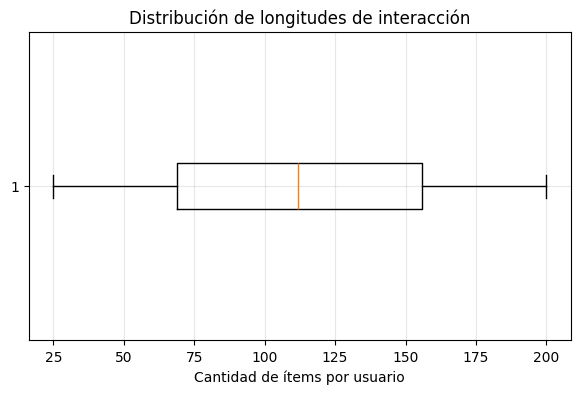

In [25]:
plt.figure(figsize=(7,4))
plt.boxplot(num_items_list, vert=False)
plt.title("Distribución de longitudes de interacción")
plt.xlabel("Cantidad de ítems por usuario")
plt.grid(alpha=0.3)
plt.show()


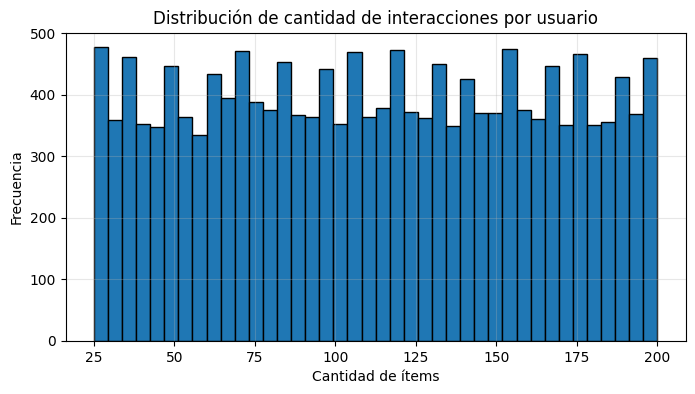

In [10]:
# Cálculo del número de interacciones por usuario
df_train["num_interactions"] = df_train["items"].apply(len)

# Histograma de longitudes
plt.figure(figsize=(8, 4))
plt.hist(df_train["num_interactions"], bins=40, edgecolor="black")
plt.title("Distribución de cantidad de interacciones por usuario")
plt.xlabel("Cantidad de ítems")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


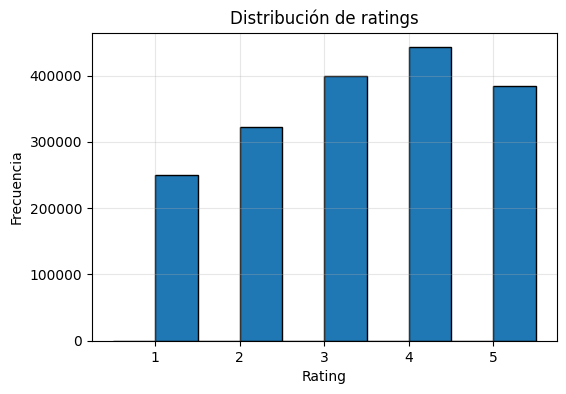

Ratings únicos presentes: [1. 2. 3. 4. 5.]


In [11]:
# Flatten de todos los ratings del dataset
all_ratings = np.concatenate(df_train["ratings"].values)

plt.figure(figsize=(6, 4))
plt.hist(all_ratings, bins=np.arange(0.5, 5.6, 0.5), edgecolor="black")
plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

print("Ratings únicos presentes:", np.unique(all_ratings))


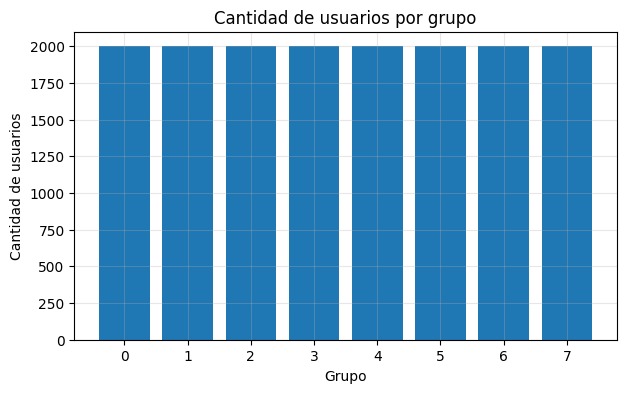

,count
user_group,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000
6,2000
7,2000


In [12]:
# Conteo por grupo
group_counts = df_train["user_group"].value_counts().sort_index()

plt.figure(figsize=(7, 4))
plt.bar(group_counts.index, group_counts.values)
plt.title("Cantidad de usuarios por grupo")
plt.xlabel("Grupo")
plt.ylabel("Cantidad de usuarios")
plt.grid(alpha=0.3)
plt.show()

group_counts


In [13]:
# Visualización de interacciones de algunos usuarios
for uid in [0, 1, 2]:
    print(f"\nUsuario {uid}:")
    print("  Grupo:", df_train.loc[uid, "user_group"])
    print("  Items:", df_train.loc[uid, "items"][:10], "...")
    print("  Ratings:", df_train.loc[uid, "ratings"][:10], "...")



Usuario 0:
  Grupo: 0
  Items: [472  97 122 654 709 467 574 544 478 338] ...
  Ratings: [4. 3. 4. 3. 5. 4. 2. 1. 4. 5.] ...

Usuario 1:
  Grupo: 0
  Items: [431 445 367 100 743 739 263 426 321 311] ...
  Ratings: [3. 5. 5. 5. 5. 3. 1. 4. 5. 4.] ...

Usuario 2:
  Grupo: 0
  Items: [224 133 227  51 230 546  57  60 743 495] ...
  Ratings: [5. 4. 3. 5. 4. 3. 4. 5. 5. 5.] ...


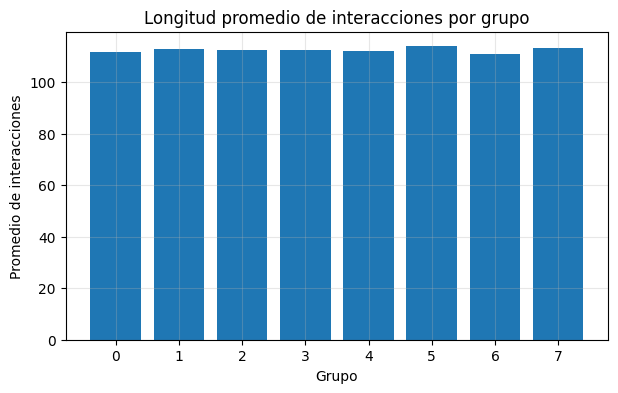

,num_interactions
user_group,
0,111.6240
1,112.7785
2,112.2615
3,112.3045
4,112.0005
5,113.8090
6,110.9145
7,113.1135


In [14]:
# Longitud promedio por grupo
group_len = df_train.groupby("user_group")["num_interactions"].mean()

plt.figure(figsize=(7,4))
plt.bar(group_len.index, group_len.values)
plt.title("Longitud promedio de interacciones por grupo")
plt.xlabel("Grupo")
plt.ylabel("Promedio de interacciones")
plt.grid(alpha=0.3)
plt.show()

group_len


/tmp/ipython-input-4253865219.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_ratings[g] for g in sorted(group_ratings)], labels=sorted(group_ratings))


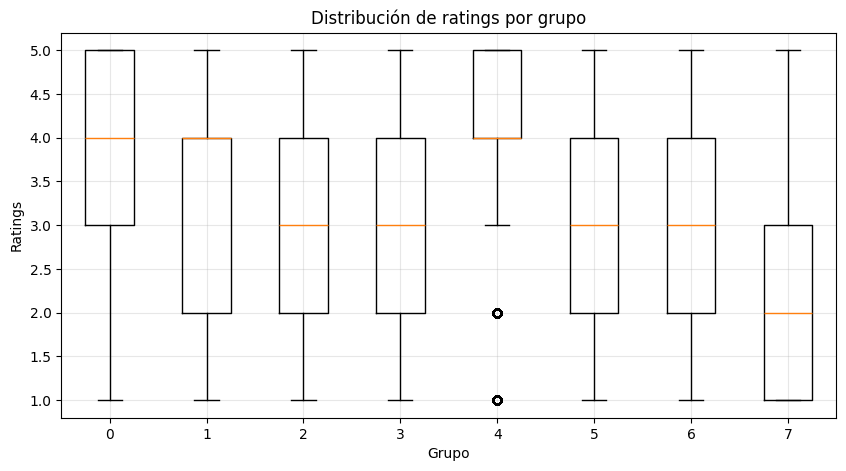

In [15]:
# Cálculo de ratings promedio por grupo
group_ratings = {}

for g in sorted(df_train["user_group"].unique()):
    group_data = df_train[df_train["user_group"] == g]
    ratings = np.concatenate(group_data["ratings"].values)
    group_ratings[g] = ratings

plt.figure(figsize=(10, 5))
plt.boxplot([group_ratings[g] for g in sorted(group_ratings)], labels=sorted(group_ratings))
plt.title("Distribución de ratings por grupo")
plt.xlabel("Grupo")
plt.ylabel("Ratings")
plt.grid(alpha=0.3)
plt.show()


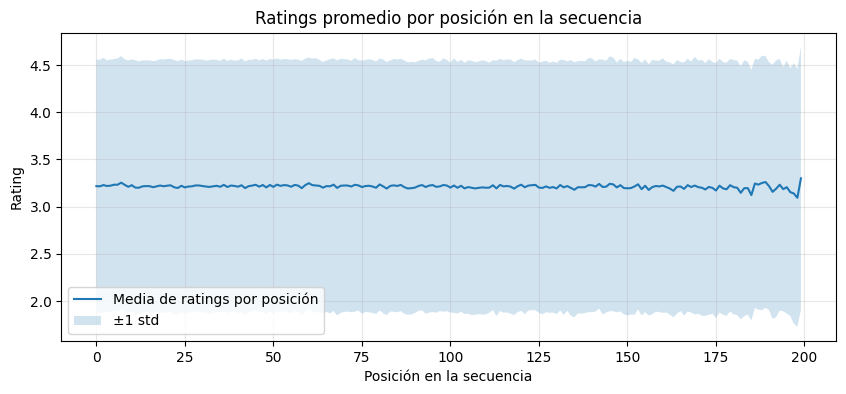

In [26]:
# Distribución de ratings por posición en la secuencia

max_len = df_train["ratings"].apply(len).max()

ratings_by_pos = [[] for _ in range(max_len)]

for rlist in df_train["ratings"]:
    for i, r in enumerate(rlist):
        ratings_by_pos[i].append(r)

# Plot de la media y desvío por posición
means = [np.mean(rp) for rp in ratings_by_pos]
stds  = [np.std(rp)  for rp in ratings_by_pos]

plt.figure(figsize=(10, 4))
plt.plot(means, label="Media de ratings por posición")
plt.fill_between(range(len(means)),
                 np.array(means)-np.array(stds),
                 np.array(means)+np.array(stds),
                 alpha=0.2, label="±1 std")
plt.title("Ratings promedio por posición en la secuencia")
plt.xlabel("Posición en la secuencia")
plt.ylabel("Rating")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


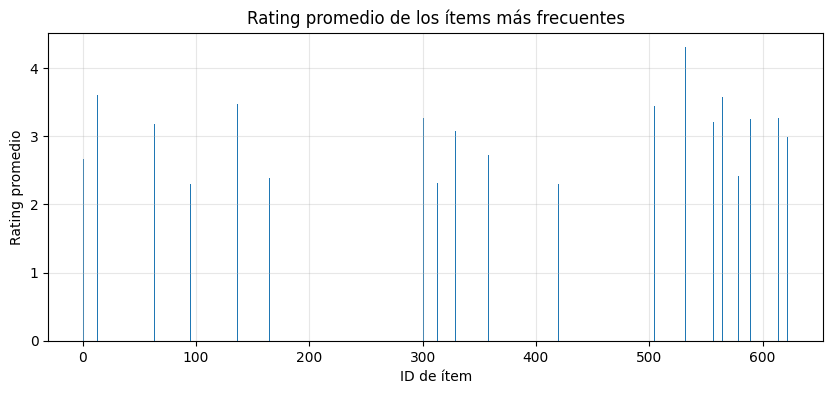

In [28]:
# Ratings promedio de los top 20 ítems más frecuentes

item_ratings_map = {item: [] for item, _ in top_items}

for items, ratings in zip(df_train["items"], df_train["ratings"]):
    for it, rt in zip(items, ratings):
        if it in item_ratings_map:
            item_ratings_map[it].append(rt)

item_means = [np.mean(item_ratings_map[it]) for it in labels]

plt.figure(figsize=(10,4))
plt.bar(labels, item_means)
plt.title("Rating promedio de los ítems más frecuentes")
plt.xlabel("ID de ítem")
plt.ylabel("Rating promedio")
plt.grid(alpha=0.3)
plt.show()


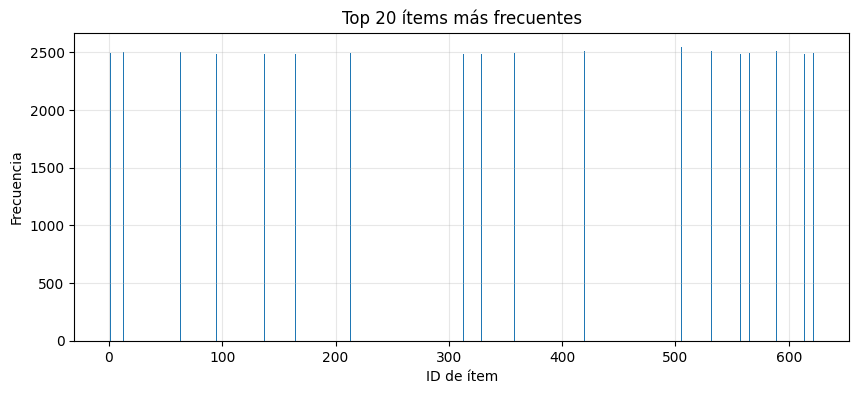

In [27]:
# Conteo de frecuencia de ítems
from collections import Counter

all_items = np.concatenate(df_train["items"].values)
item_counts = Counter(all_items)

# Top 20 ítems más frecuentes
top_items = item_counts.most_common(20)

labels, counts = zip(*top_items)

plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.title("Top 20 ítems más frecuentes")
plt.xlabel("ID de ítem")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


# 1.3 Preprocesamiento para Decision Transformer

In [29]:
# Preprocesamiento: conversión del DataFrame raw al formato Decision Transformer

def create_dt_dataset(df_train):
    """
    Convierte el dataset raw a formato Decision Transformer.

    Args:
        df_train: DataFrame con columnas [user_id, user_group, items, ratings]

    Returns:
        trajectories: lista de diccionarios, uno por usuario, con las keys:
            - 'items': numpy array de item IDs
            - 'ratings': numpy array de ratings
            - 'returns_to_go': numpy array con suma de rewards futuros (R̂_t)
            - 'timesteps': numpy array con índices temporales [0, 1, ..., T-1]
            - 'user_group': entero con el grupo del usuario
    """
    trajectories = []

    for _, row in df_train.iterrows():
        items = row["items"]
        ratings = row["ratings"]
        group = row["user_group"]

        # Conversión explícita a numpy arrays
        items = np.asarray(items, dtype=np.int64)
        ratings = np.asarray(ratings, dtype=np.float32)

        # Cálculo de returns-to-go (R̂_t = r_t + r_{t+1} + ... + r_T)
        returns_to_go = np.zeros_like(ratings, dtype=np.float32)
        returns_to_go[-1] = ratings[-1]
        for t in range(len(ratings) - 2, -1, -1):
            returns_to_go[t] = ratings[t] + returns_to_go[t + 1]

        timesteps = np.arange(len(items), dtype=np.int64)

        trajectory = {
            "items": items,
            "ratings": ratings,
            "returns_to_go": returns_to_go,
            "timesteps": timesteps,
            "user_group": int(group),
        }

        trajectories.append(trajectory)

    return trajectories

# Aplicación al dataset de entrenamiento
trajectories_train = create_dt_dataset(df_train)

print(f"Total de trayectorias generadas: {len(trajectories_train)}")
print("Keys de la primera trayectoria:", trajectories_train[0].keys())


Total de trayectorias generadas: 16000
Keys de la primera trayectoria: dict_keys(['items', 'ratings', 'returns_to_go', 'timesteps', 'user_group'])


In [30]:
# Validaciones básicas sobre el formato de las trayectorias

def validate_trajectories(trajectories, num_checks=10):
    """
    Validación de formato y consistencia de las trayectorias.
    """
    for i in range(min(num_checks, len(trajectories))):
        traj = trajectories[i]
        items = traj["items"]
        ratings = traj["ratings"]
        rtg = traj["returns_to_go"]
        timesteps = traj["timesteps"]

        # Las longitudes deben coincidir
        assert len(items) == len(ratings) == len(rtg) == len(timesteps), \
            f"Longitudes inconsistentes en trayectoria {i}"

        # R̂_0 debe ser suma de todos los ratings
        assert np.isclose(rtg[0], ratings.sum()), \
            f"R̂_0 incorrecto en trayectoria {i}"

        # R̂_{T-1} debe ser igual al último rating
        assert np.isclose(rtg[-1], ratings[-1]), \
            f"R̂_T incorrecto en trayectoria {i}"

    print(f"Validación básica correcta en las primeras {min(num_checks, len(trajectories))} trayectorias.")

validate_trajectories(trajectories_train)


Validación básica correcta en las primeras 10 trayectorias.


=== Estadísticas de longitud de trayectorias ===
Mínimo: 25
Máximo: 200
Promedio: 112.35075
Percentiles [25, 50, 75, 95]: [ 69. 112. 156. 192.]


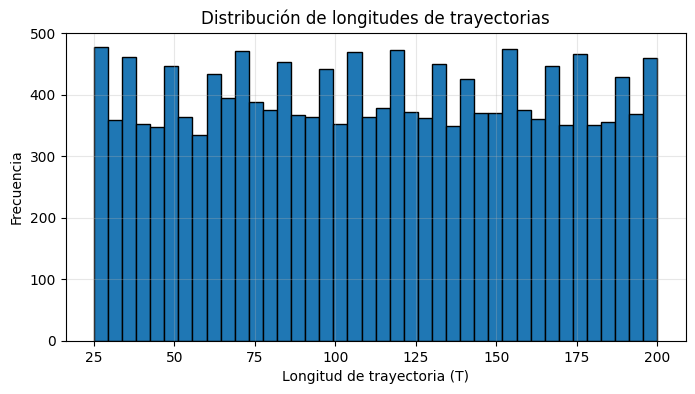

In [31]:
# Estadísticas de longitudes de trayectorias

traj_lengths = np.array([len(traj["items"]) for traj in trajectories_train])

print("=== Estadísticas de longitud de trayectorias ===")
print("Mínimo:", traj_lengths.min())
print("Máximo:", traj_lengths.max())
print("Promedio:", traj_lengths.mean())
print("Percentiles [25, 50, 75, 95]:", np.percentile(traj_lengths, [25, 50, 75, 95]))

plt.figure(figsize=(8,4))
plt.hist(traj_lengths, bins=40, edgecolor="black")
plt.title("Distribución de longitudes de trayectorias")
plt.xlabel("Longitud de trayectoria (T)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


=== Estadísticas de R̂_0 (return-to-go inicial) ===
Mínimo: 42.0
Máximo: 849.0
Promedio: 361.32913
Percentiles [25, 50, 75, 95]: [213. 350. 497. 664.]


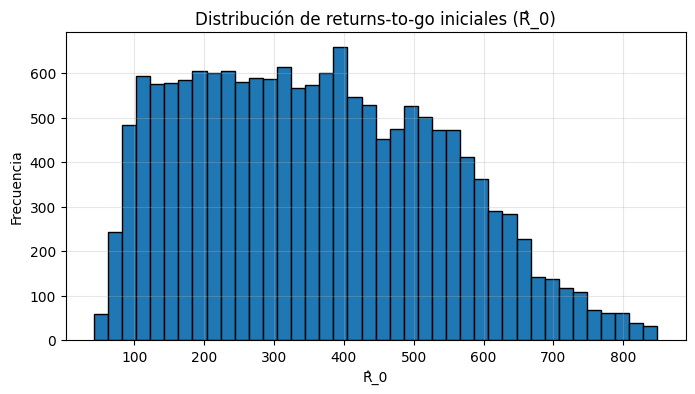

In [32]:
# Distribución de returns-to-go iniciales (R̂_0)

initial_returns = np.array([traj["returns_to_go"][0] for traj in trajectories_train])

print("=== Estadísticas de R̂_0 (return-to-go inicial) ===")
print("Mínimo:", initial_returns.min())
print("Máximo:", initial_returns.max())
print("Promedio:", initial_returns.mean())
print("Percentiles [25, 50, 75, 95]:", np.percentile(initial_returns, [25, 50, 75, 95]))

plt.figure(figsize=(8,4))
plt.hist(initial_returns, bins=40, edgecolor="black")
plt.title("Distribución de returns-to-go iniciales (R̂_0)")
plt.xlabel("R̂_0")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


In [33]:
# Guardado de las trayectorias procesadas en disco

import os
import pickle

processed_dir = "data/processed"
os.makedirs(processed_dir, exist_ok=True)

output_path = os.path.join(processed_dir, f"{DATASET}_trajectories_train.pkl")

with open(output_path, "wb") as f:
    pickle.dump(trajectories_train, f)

print(f"Dataset procesado guardado en: {output_path}")


Dataset procesado guardado en: data/processed/netflix_trajectories_train.pkl
